## Table of Contents

## CONTENTS

#### *Important note Due to the large dataset of the data and RAM, the main dataframe has a 30% random sample from the original dataframe at the end of 4.9.*

#### 1. Importing libraries and data


#### 2.  Data checks and preparation
  

#### 3. Addressing PII concerns
   

#### 4. Create regions, viewing region information, and region flags


#### 5. Subset data    
   
 
    
#### 6. Exclusion flag for low activity customers

           
#### NOTE: The dataframe going forward for normal activity customers is df3
      
#### 7. Customer profile variables


#### 8.  Final overview of dataframe(s)
#### 9.  Exporting file(s)


In [3]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
path = r'C:\Users\Javier\Documents\Master Folder'

In [5]:
df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'full_merged_data_task.pkl'))

In [6]:
df_departments = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

Data Checks and Preparation

In [7]:
# overview
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
# checking columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   eval_set                object  
 3   order_number            int64   
 4   orders_day_of_week      int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  Unnamed: 0              int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  _merge                  category
 16  price_range_loc         object  
 17  busiest_day             object  
 18  busiest_days            object  
 19  busiest_period_of_day   object  
 20  max_order               int64   
 21  loyalt

In [9]:
# checking columns/rows
df.shape

(32404859, 35)

In [10]:
# dataframe overview
df_departments.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,prices
0,0,1,Chocolate Sandwich Cookies,61,19,5.8
1,1,2,All-Seasons Salt,104,13,9.3
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,4,5,Green Chile Anytime Sauce,5,13,4.3


In [11]:
# checking columns and datatypes
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49693 entries, 0 to 49692
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     49693 non-null  int64  
 1   product_id     49693 non-null  int64  
 2   product_name   49677 non-null  object 
 3   aisle_id       49693 non-null  int64  
 4   department_id  49693 non-null  int64  
 5   prices         49693 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [12]:
# changing datatype to reduce RAM
df_departments['Unnamed: 0'] = df_departments['Unnamed: 0'].astype('int8')

In [13]:
# checking rows/columns
df_departments.shape

(49693, 6)

In [14]:
%%time
# merging department names into one big dataframe
df = df.merge(df_departments, how = 'inner', left_on='department_id', right_index=True)

CPU times: total: 26.7 s
Wall time: 26.8 s


# Addressing PII conerns

We are going to drop the customer first and last name due to customer_id being a good identirier for data. We are also gonna drop department_id, _merge, aisle_id and unamed to saved ram usage 

### CReate regions, view data, and create flags

In [15]:
# create new dataframe with dropped columns
df2 = df.drop(columns = ['first_name', 'surname', 'department_id', '_merge', 'Unnamed: 0_y'])

In [16]:
# creating region series with all appropriate states
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 
             'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio',
          'North Dakota', 'South Dakota', 'Nebraska', 'Kansas',
          'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia',
         'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee',
         'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona',
        'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [17]:
# create new region column identifying the regions
df2.loc[df2['state'].isin(northeast), 'region'] = 'northeast'
df2.loc[df2['state'].isin(midwest), 'region'] = 'midwest'
df2.loc[df2['state'].isin(south), 'region'] = 'south'
df2.loc[df2['state'].isin(west), 'region'] = 'west'

In [18]:
# ensuring that all records were accounted for
df2['region'].value_counts(dropna=False)

south        10791885
west          8292913
midwest       7597325
northeast     5722736
Name: region, dtype: int64

## Exploring data among the regions

In [19]:
# checking frequency of regions
df2[['region', 'user_id']].groupby('region').agg({'user_id': pd.Series.nunique,}).sort_values(by='user_id', ascending=False)

,user_id
region,
south,68737
west,52565
midwest,48519
northeast,36388


South has the most customers and northeast has the fewest

In [20]:
# seeing how many states are in each region
df2[['region', 'state']].groupby('region').agg({'state': pd.Series.nunique,}).sort_values(by='state', ascending=False)

,state
region,
south,17
west,13
midwest,12
northeast,9


There are most states in south and least in northeast which explains the customer difference

In [21]:
# checking what region customers spend the most in sales
df2[['purchase_frequency', 'region']].groupby('region').agg('sum').sort_values(by ='purchase_frequency', ascending=False)

,purchase_frequency
region,
south,112201594.0
west,85915806.5
midwest,79454509.0
northeast,59365954.5


The south has the highest purchase frequency while the northeast has the least

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32403040
Data columns (total 38 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 object 
 2   eval_set                object 
 3   order_number            int64  
 4   orders_day_of_week      int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id_x            int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  Unnamed: 0_x            int64  
 11  product_name_x          object 
 12  aisle_id_x              int64  
 13  department_id_x         int64  
 14  prices_x                float64
 15  price_range_loc         object 
 16  busiest_day             object 
 17  busiest_days            object 
 18  busiest_period_of_day   object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  average_spending        float

In [23]:
df2[['region', 'product_id_x']].groupby(['region']).agg('count').sort_values(by='product_id_x', ascending=False)

,product_id_x
region,
south,10791885
west,8292913
midwest,7597325
northeast,5722736


In [24]:
# creating a new dataframe that summarizes the data by region
df_region = df2[['prices_x', 'region', 'user_id', 'order_id']].groupby(['region']).agg({'prices_x':'sum', 'user_id': pd.Series.nunique, 'order_id' : pd.Series.nunique})

In [25]:
# viewing output
df_region

,prices_x,user_id,order_id
region,,,
midwest,96603658.7,48519,754275
northeast,66126199.8,36388,567162
south,131613265.4,68737,1071562
west,93874398.7,52565,821686


In [26]:
# renaming the columns so that it is clear
df_region = df_region.rename(columns={'prices':'sum_of_sales', 'user_id':'customer_count', 'order_id':'orders_placed'})

In [27]:
# viewing output
df_region

,prices_x,customer_count,orders_placed
region,,,
midwest,96603658.7,48519,754275
northeast,66126199.8,36388,567162
south,131613265.4,68737,1071562
west,93874398.7,52565,821686


### Aggregate by region

In [28]:
# creating column for average price per oder
df_region['avg_price_per_order'] = df_region['prices_x']/df_region['orders_placed'] 

In [29]:
# average price per customer
df_region['avg_orders_per_customer'] = df_region['orders_placed']/df_region['customer_count']

In [30]:
# viewing dataframe
df_region

,prices_x,customer_count,orders_placed,avg_price_per_order,avg_orders_per_customer
region,,,,,
midwest,96603658.7,48519,754275,128.074852,15.545972
northeast,66126199.8,36388,567162,116.591379,15.586512
south,131613265.4,68737,1071562,122.823752,15.589304
west,93874398.7,52565,821686,114.246073,15.631808


#### What region has the highest average price per customer? 

In [31]:
# viewing sorted data by price per customer to see what region customers spend the most in
df_region.sort_values(by='prices_x', ascending=False)

,prices_x,customer_count,orders_placed,avg_price_per_order,avg_orders_per_customer
region,,,,,
south,131613265.4,68737,1071562,122.823752,15.589304
midwest,96603658.7,48519,754275,128.074852,15.545972
west,93874398.7,52565,821686,114.246073,15.631808
northeast,66126199.8,36388,567162,116.591379,15.586512


Result is the south has more because most likely it has the most states with more sales and more orders placed

# subset data

#### Create customer and order subset with no duplicates

In [32]:
# create a dataframe that just lists customers
customers = df2.drop_duplicates(subset=['user_id'])
customers.shape

(206209, 38)

In [33]:
# create a dataframe that lists just orders
df_orders = df2.drop_duplicates(subset='order_id').copy()
df_orders.shape

(3214685, 38)

## Crosstabl for customer loyalty in regions

In [34]:
# using crosstab to view cutomer loyalty in the each region
cross_customers=pd.crosstab(customers['region'], customers['loyalty_flag'], dropna=False)
cross_customers

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
midwest,3991,26333,18195
northeast,3027,19869,13492
south,5637,37491,25609
west,4362,28635,19568


South has most loyal, new and regular customers while northeast has the fewest


### Percentage of customers in region based off population

In [35]:
#### viewing percentage of customers in each region based on region population
print('midwest: ', round(cross_customers.iloc[0,0]/48346*100, 2),'%')
print('northeast: ', round(cross_customers.iloc[1,0]/36255*100, 2),'%')
print('south: ', round(cross_customers.iloc[2,0]/68464*100, 2),'%')
print('west: ', round(cross_customers.iloc[3,0]/52375*100, 2),'%')

midwest:  8.26 %
northeast:  8.35 %
south:  8.23 %
west:  8.33 %


All regions are fairly simliar within loual customers however it shows the northeast has the most loyal customers

## creating exclusion flag for low active customers

In [36]:
# creating exclusion flag
df2.loc[df2['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'
df2.loc[df2['max_order']>= 5, 'exclusion_flag'] = 'Normal activity customer'
df2['exclusion_flag'].value_counts(dropna=False)

Normal activity customer    30964564
Low activity customer        1440295
Name: exclusion_flag, dtype: int64

In [37]:
# creating subset dataframe for low activity customers 
df_low_activity = df2[df2['exclusion_flag']=='Low activity customer']
df_low_activity.shape

(1440295, 39)

In [38]:
# creating subset dataframe for normal activity customers
df3 = df2[df2['exclusion_flag']=='Normal activity customer'].copy()
df3.shape

(30964564, 39)

In [39]:
df3.exclusion_flag.value_counts()

Normal activity customer    30964564
Name: exclusion_flag, dtype: int64

In [40]:
print(df3['exclusion_flag'].unique())

['Normal activity customer']


In [41]:
# making certain there are no missing values
df3['exclusion_flag'].value_counts(dropna = False)


Normal activity customer    30964564
Name: exclusion_flag, dtype: int64

In [42]:
# exporting low activity customer subset
df_low_activity.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10_low_activity_customers_javierEscalante.pkl'))

In [43]:
# exporting normal activity customer subset
df3.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10_normal_activity_customers_javierescalante.pkl'))

### Customer variables

##### AGE RANGES

In [44]:
# using .loc to divide ages of customers
df3.loc[(df3['age'] >= 18) & (df3['age'] <= 35), 'age_range'] = '1'
df3.loc[(df3['age'] > 35) & (df3['age'] <= 64), 'age_range'] = '2'
df3.loc[(df3['age'] > 64), 'age_range'] = '3'
df3['age_range'].value_counts()

2    14030215
1     8738805
3     8195544
Name: age_range, dtype: int64

Most common instacart range is from 36 to 64 years of age

## Tome of day brackets

Time of day breakdown: 
* 12:00 am - 05:59 am = early morning
* 06:00 am - 11:59 pm = morning
* 12:00 pm - 04:59 pm = afternoon
* 05:00 pm - 07:59 pm = evening
* 08:00 pm - 11:59 pm = night

In [45]:
# creating a list to break down certain periods of the day
df_orders.loc[(df_orders['order_hour_of_day'] > 0) & (df_orders['order_hour_of_day'] < 6), 'time_of_day'] = 'early_morning'
df_orders.loc[(df_orders['order_hour_of_day'] >= 6) & (df_orders['order_hour_of_day'] < 12), 'time_of_day'] = 'morning'
df_orders.loc[(df_orders['order_hour_of_day'] >= 12) & (df_orders['order_hour_of_day'] < 17), 'time_of_day'] = 'afternoon'
df_orders.loc[(df_orders['order_hour_of_day'] >= 17) & (df_orders['order_hour_of_day'] < 20), 'time_of_day'] = 'evening'
df_orders.loc[(df_orders['order_hour_of_day'] >= 20) & (df_orders['order_hour_of_day'] < 24), 'time_of_day'] = 'night'
df_orders['time_of_day'].value_counts()

afternoon        1304945
morning          1067077
evening           516677
night             266686
early_morning      37929
Name: time_of_day, dtype: int64

In [46]:
df_orders.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id_x,add_to_cart_order,reordered,...,no_of_dependants,marital_status,income,product_id_y,product_name_y,aisle_id_y,department_id_y,prices_y,region,time_of_day
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,3,married,40423,8,Cut Russet Potatoes Steam N' Mash,116,1,1.1,south,morning
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,3,married,40423,8,Cut Russet Potatoes Steam N' Mash,116,1,1.1,south,morning
2,473747,1,prior,3,3,12,21.0,196,1,1,...,3,married,40423,8,Cut Russet Potatoes Steam N' Mash,116,1,1.1,south,afternoon
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,3,married,40423,8,Cut Russet Potatoes Steam N' Mash,116,1,1.1,south,morning
4,431534,1,prior,5,4,15,28.0,196,1,1,...,3,married,40423,8,Cut Russet Potatoes Steam N' Mash,116,1,1.1,south,afternoon


<AxesSubplot:>

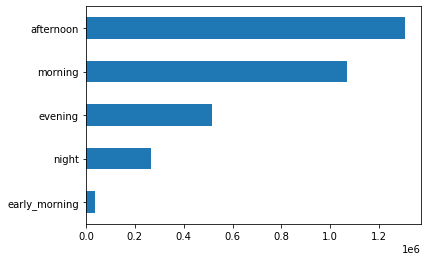

In [47]:
df_orders['time_of_day'].value_counts().sort_values().plot.barh()

Most orders are between 6 am and 5am and the fewest are between 12am and 6 am

In [48]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 32380882
Data columns (total 40 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 object 
 2   eval_set                object 
 3   order_number            int64  
 4   orders_day_of_week      int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
 7   product_id_x            int64  
 8   add_to_cart_order       int64  
 9   reordered               int64  
 10  Unnamed: 0_x            int64  
 11  product_name_x          object 
 12  aisle_id_x              int64  
 13  department_id_x         int64  
 14  prices_x                float64
 15  price_range_loc         object 
 16  busiest_day             object 
 17  busiest_days            object 
 18  busiest_period_of_day   object 
 19  max_order               int64  
 20  loyalty_flag            object 
 21  average_spending        float

In [53]:
print(df3['department_id_x'].unique())

[ 7 16 19 17  4 14 13  3  1  9 15 11 12 20  6  5 21  8 18  2 10]


In [55]:
# first, identify all the products purchased from the pet department
df3['pet_stuff'] = [1 if x == 'pets' else 0 for x in df3['department_id_x']]

In [56]:
# then, apply it across the whole customer's orders
df3['pet_stuff'] = df3.groupby(['user_id'])['pet_stuff'].transform('max')

In [57]:
# reduce datatype to save RAM
df3['pet_stuff'] = df3['pet_stuff'].astype('int8')

## Baby flag

In [58]:
# first, identify all the products purchased from the baby department
df3['baby_stuff'] = [1 if x == 'babies' else 0 for x in df3['department_id_x']]

In [59]:
# then, apply it across the whole customer's orders
df3['baby_stuff'] = df3.groupby(['user_id'])['baby_stuff'].transform('max')

In [60]:
# change data type to save RAM
df3['baby_stuff'] = df3['baby_stuff'].astype('int8')

### Snack flag

In [61]:
# first, identify all the products purchased from the snacks department
df3['snacks'] = [1 if x == 'snacks' else 0 for x in df3['department_id_x']]

In [62]:
# then, apply it just across the individual order
df3['snacks'] = df3.groupby(['order_id'])['snacks'].transform('max')

In [63]:
# change datatype to reduce RAM
df3['snacks'] = df3['snacks'].astype('int8')

### Grouping by income

Income Breakdown

* Below 52,200 = Low Income

* Between 52,200 & 156,600 = Middle Income

* Above 156,600 = High Income

In [65]:
# creating income flags
df3.loc[df3['income']<52200, 'income_flag'] = 'Low Income'
df3.loc[(df3['income']>=52200) & (df3['income']<=156600), 'income_flag'] = 'Middle Income' 
df3.loc[df3['income']>156600, 'income_flag'] = 'High Income'
df3['income_flag'].value_counts(dropna = False)

Middle Income    24541393
Low Income        3691708
High Income       2731463
Name: income_flag, dtype: int64

Most instacart customers fall in the middle income bracket. The least fall into the high income bracket

### Final overview

In [66]:
df3.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id_x,add_to_cart_order,reordered,...,aisle_id_y,department_id_y,prices_y,region,exclusion_flag,age_range,pet_stuff,baby_stuff,snacks,income_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,116,1,1.1,south,Normal activity customer,1,0,0,0,Low Income
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,116,1,1.1,south,Normal activity customer,1,0,0,0,Low Income
2,473747,1,prior,3,3,12,21.0,196,1,1,...,116,1,1.1,south,Normal activity customer,1,0,0,0,Low Income
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,116,1,1.1,south,Normal activity customer,1,0,0,0,Low Income
4,431534,1,prior,5,4,15,28.0,196,1,1,...,116,1,1.1,south,Normal activity customer,1,0,0,0,Low Income


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32403040
Data columns (total 42 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   department_id           int64   
 1   order_id                int64   
 2   user_id                 object  
 3   eval_set                object  
 4   order_number            int64   
 5   orders_day_of_week      int64   
 6   order_hour_of_day       int64   
 7   days_since_prior_order  float64 
 8   product_id_x            int64   
 9   add_to_cart_order       int64   
 10  reordered               int64   
 11  Unnamed: 0_x            int64   
 12  product_name_x          object  
 13  aisle_id_x              int64   
 14  department_id_x         int64   
 15  prices_x                float64 
 16  _merge                  category
 17  price_range_loc         object  
 18  busiest_day             object  
 19  busiest_days            object  
 20  busiest_period_of_day   object  
 21  max_or

In [68]:
# check shapes before part two
df3.shape

(30964564, 44)

In [69]:
df.shape

(32404859, 42)

In [70]:
df_region.shape

(4, 5)

# Export

In [71]:
%%time
# exporting main dataframe df3 to pickle file
# this set contains all the normal activity customers and additional flags/profiling
df3.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10_part1_javierescalante.pkl'))

CPU times: total: 31.8 s
Wall time: 37.1 s


In [72]:
%%time
# exporting region dataframe df_region to pickle file
# this set contains all the region information based on the 30% sample size. 
df_region.to_pickle(os.path.join(path, '02 Data','Prepared Data', '4.10_region_javierEscalante_final.pkl'))

CPU times: total: 0 ns
Wall time: 499 µs
